   CMPLNT_NUM CMPLNT_FR_DT CMPLNT_FR_TM CMPLNT_TO_DT CMPLNT_TO_TM      RPT_DT  \
0   736216184   2016-09-30     23:25:00   09/30/2016     23:25:00  09/30/2016   
1   294332956   2016-09-30     23:16:00   09/30/2016     23:21:00  09/30/2016   
2   852981427   2016-09-30     23:00:00   09/30/2016     23:05:00  09/30/2016   
3   369976063   2016-09-30     23:00:00          NaN          NaN  09/30/2016   
4   117213771   2016-09-30     23:00:00   09/30/2016     23:10:00  09/30/2016   

   KY_CD                     OFNS_DESC  PD_CD                      PD_DESC  \
0    236             DANGEROUS WEAPONS  782.0     WEAPONS, POSSESSION, ETC   
1    344  ASSAULT 3 & RELATED OFFENSES  101.0                    ASSAULT 3   
2    235               DANGEROUS DRUGS  567.0  MARIJUANA, POSSESSION 4 & 5   
3    118             DANGEROUS WEAPONS  793.0         WEAPONS POSSESSION 3   
4    578                 HARRASSMENT 2  637.0   HARASSMENT,SUBD 1,CIVILIAN   

   ... ADDR_PCT_CD LOC_OF_OCCUR_DESC        

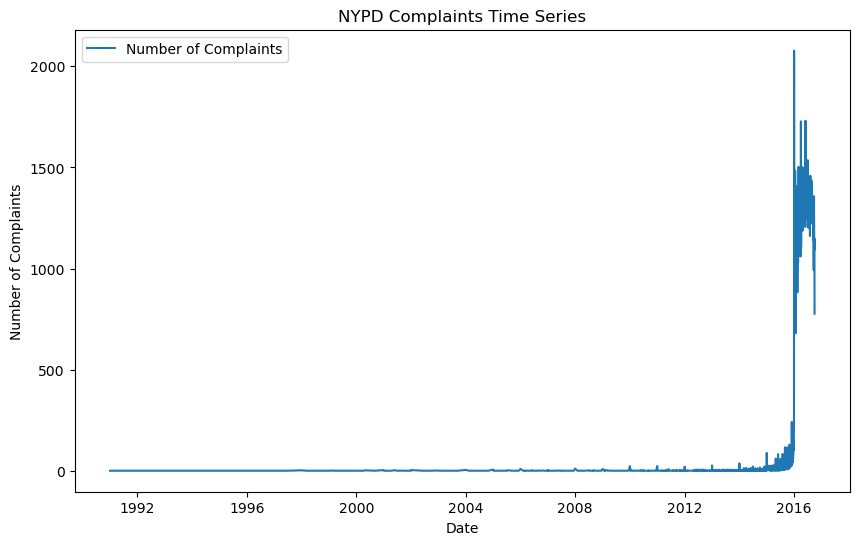

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('../data/NYPD_Complaint_Data_Current_YTD.csv')

df['CMPLNT_FR_DT'] = pd.to_datetime(df['CMPLNT_FR_DT'], errors='coerce')

filtered_df = df[(df['CMPLNT_FR_DT'].dt.year >= 1990) & (df['CMPLNT_FR_DT'].dt.year <= 2024)]

print(filtered_df.head())
df =  filtered_df

invalid_dates = df['CMPLNT_FR_DT'][pd.to_datetime(df['CMPLNT_FR_DT'], errors='coerce').isna()]
print("Invalid Dates:")
print(invalid_dates)

df = df[~pd.to_datetime(df['CMPLNT_FR_DT'], errors='coerce').isna()]

df['CMPLNT_FR_DT'] = pd.to_datetime(df['CMPLNT_FR_DT'])

time_series = df.groupby('CMPLNT_FR_DT').size()

print(time_series.head())
df['CMPLNT_FR_DT'] = pd.to_datetime(df['CMPLNT_FR_DT'])

time_series = df.groupby('CMPLNT_FR_DT').size()

plt.figure(figsize=(10, 6))
plt.plot(time_series.index, time_series.values, label='Number of Complaints')
plt.xlabel('Date')
plt.ylabel('Number of Complaints')
plt.title('NYPD Complaints Time Series')
plt.legend()
plt.show()

In [13]:
import pandas as pd

df = pd.read_csv('../data/NYPD_Complaint_Data_Current_YTD.csv')

df['CMPLNT_FR_DT'] = pd.to_datetime(df['CMPLNT_FR_DT'], errors='coerce')

filtered_df = df[(df['CMPLNT_FR_DT'].dt.year >= 2016) & (df['CMPLNT_FR_DT'].dt.year <= 2024)]

print(filtered_df.head())
df =  filtered_df

   CMPLNT_NUM CMPLNT_FR_DT CMPLNT_FR_TM CMPLNT_TO_DT CMPLNT_TO_TM      RPT_DT  \
0   736216184   2016-09-30     23:25:00   09/30/2016     23:25:00  09/30/2016   
1   294332956   2016-09-30     23:16:00   09/30/2016     23:21:00  09/30/2016   
2   852981427   2016-09-30     23:00:00   09/30/2016     23:05:00  09/30/2016   
3   369976063   2016-09-30     23:00:00          NaN          NaN  09/30/2016   
4   117213771   2016-09-30     23:00:00   09/30/2016     23:10:00  09/30/2016   

   KY_CD                     OFNS_DESC  PD_CD                      PD_DESC  \
0    236             DANGEROUS WEAPONS  782.0     WEAPONS, POSSESSION, ETC   
1    344  ASSAULT 3 & RELATED OFFENSES  101.0                    ASSAULT 3   
2    235               DANGEROUS DRUGS  567.0  MARIJUANA, POSSESSION 4 & 5   
3    118             DANGEROUS WEAPONS  793.0         WEAPONS POSSESSION 3   
4    578                 HARRASSMENT 2  637.0   HARASSMENT,SUBD 1,CIVILIAN   

   ... ADDR_PCT_CD LOC_OF_OCCUR_DESC        

In [14]:
invalid_dates = df['CMPLNT_FR_DT'][pd.to_datetime(df['CMPLNT_FR_DT'], errors='coerce').isna()]
print("Invalid Dates:")
print(invalid_dates)

df = df[~pd.to_datetime(df['CMPLNT_FR_DT'], errors='coerce').isna()]

df['CMPLNT_FR_DT'] = pd.to_datetime(df['CMPLNT_FR_DT'])

time_series = df.groupby('CMPLNT_FR_DT').size()

print(time_series.head())
test_data = time_series.iloc[-25:]
time_series = time_series.iloc[:-25]


Invalid Dates:
Series([], Name: CMPLNT_FR_DT, dtype: datetime64[ns])
CMPLNT_FR_DT
2016-01-01    2077
2016-01-02    1181
2016-01-03    1072
2016-01-04    1086
2016-01-05    1040
dtype: int64


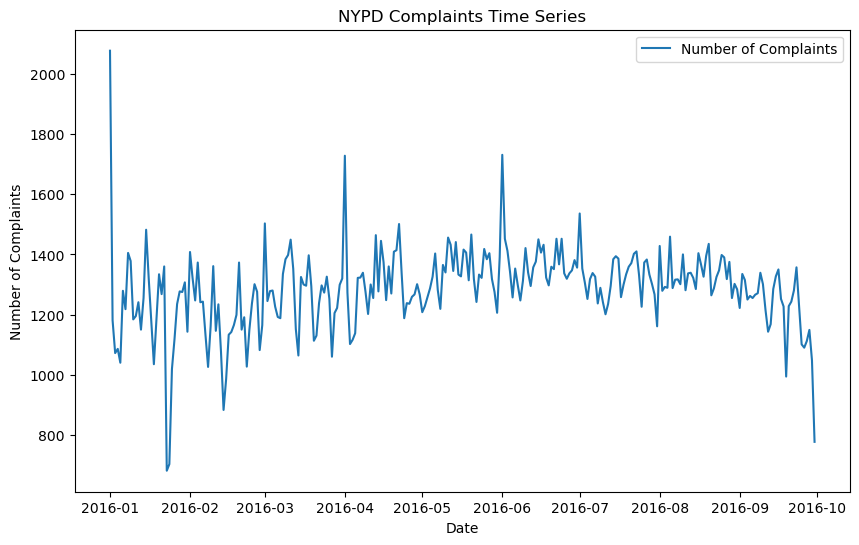

In [15]:
df['CMPLNT_FR_DT'] = pd.to_datetime(df['CMPLNT_FR_DT'])

# Aggregate the data by date and count the number of complaints for each date
time_series = df.groupby('CMPLNT_FR_DT').size()

plt.figure(figsize=(10, 6))
plt.plot(time_series.index, time_series.values, label='Number of Complaints')
plt.xlabel('Date')
plt.ylabel('Number of Complaints')
plt.title('NYPD Complaints Time Series')
plt.legend()
plt.show()



In [16]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

df = pd.read_csv('../data/NYPD_Complaint_Data_Current_YTD.csv')

df['CMPLNT_FR_DT'] = pd.to_datetime(df['CMPLNT_FR_DT'], errors='coerce')

# Filter data between 2000 and 2024
df = df[(df['CMPLNT_FR_DT'].dt.year >= 2016) & (df['CMPLNT_FR_DT'].dt.year <= 2024)]

# Remove rows with invalid dates
df = df[~pd.to_datetime(df['CMPLNT_FR_DT'], errors='coerce').isna()]

time_series = df.groupby('CMPLNT_FR_DT').size().reset_index(name='count')

time_series.set_index('CMPLNT_FR_DT', inplace=True)

In [17]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(time_series)

def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:(i + seq_length), 0])
        y.append(data[i + seq_length, 0])
    return np.array(X), np.array(y)


sequence_length = 10
X, y = create_sequences(scaled_data, sequence_length)

# Split the data into training and testing sets (80% train, 20% test)
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [18]:
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [19]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(sequence_length, 1)))
model.add(LSTM(80, return_sequences=True))
model.add(LSTM(70, return_sequences=False))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_absolute_error')

/home/rog-suvab/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [20]:
model.fit(X_train, y_train, batch_size=8, epochs=400, validation_data=(X_test, y_test), verbose=2)

train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

Epoch 1/400
27/27 - 2s - 87ms/step - loss: 0.1247 - val_loss: 0.0553
Epoch 2/400
27/27 - 0s - 6ms/step - loss: 0.0659 - val_loss: 0.0586
Epoch 3/400
27/27 - 0s - 6ms/step - loss: 0.0679 - val_loss: 0.0550
Epoch 4/400
27/27 - 0s - 8ms/step - loss: 0.0619 - val_loss: 0.0557
Epoch 5/400
27/27 - 0s - 6ms/step - loss: 0.0654 - val_loss: 0.0553
Epoch 6/400
27/27 - 0s - 7ms/step - loss: 0.0645 - val_loss: 0.0844
Epoch 7/400
27/27 - 0s - 6ms/step - loss: 0.0629 - val_loss: 0.0569
Epoch 8/400
27/27 - 0s - 6ms/step - loss: 0.0623 - val_loss: 0.0599
Epoch 9/400
27/27 - 0s - 6ms/step - loss: 0.0679 - val_loss: 0.0567
Epoch 10/400
27/27 - 0s - 6ms/step - loss: 0.0603 - val_loss: 0.0642
Epoch 11/400
27/27 - 0s - 6ms/step - loss: 0.0625 - val_loss: 0.0637
Epoch 12/400
27/27 - 0s - 7ms/step - loss: 0.0621 - val_loss: 0.0554
Epoch 13/400
27/27 - 0s - 7ms/step - loss: 0.0642 - val_loss: 0.0571
Epoch 14/400
27/27 - 0s - 5ms/step - loss: 0.0621 - val_loss: 0.0643
Epoch 15/400
27/27 - 0s - 7ms/step - loss:

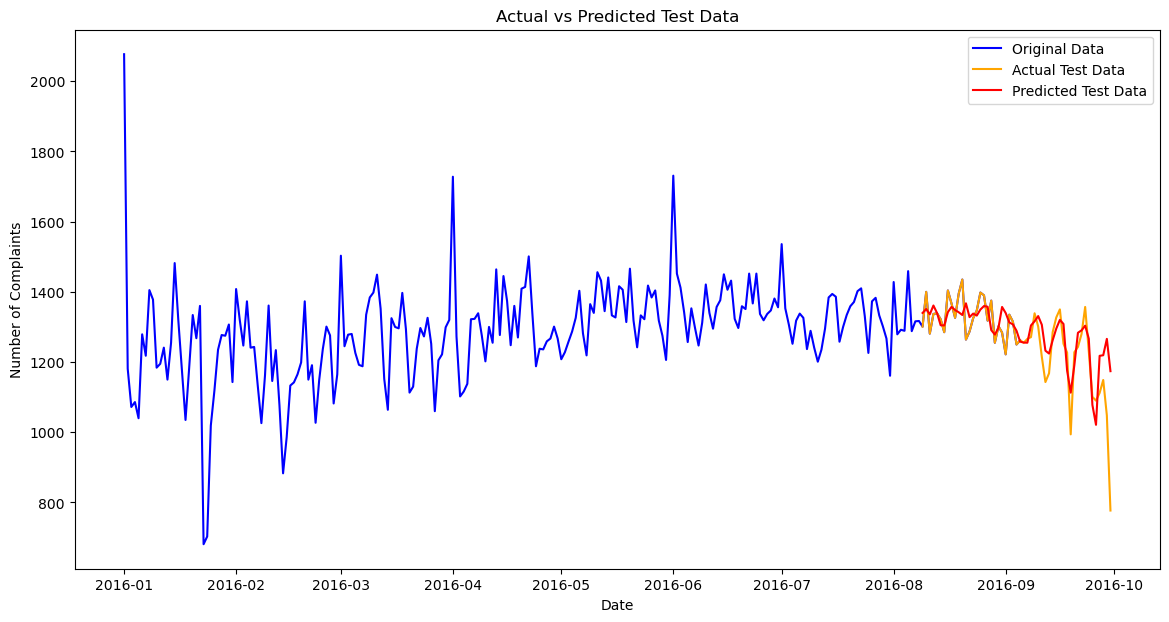

In [21]:

y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))
plt.figure(figsize=(14, 7))

plt.plot(time_series.index[:-25], time_series['count'][:-25], label='Original Data', color='blue')
plt.plot(time_series.index[split + sequence_length:], y_test_actual, label='Actual Test Data', color='orange')
plt.plot(time_series.index[split + sequence_length:], test_predict, label='Predicted Test Data', color='red')

plt.legend()
plt.xlabel('Date')
plt.ylabel('Number of Complaints')
plt.title('Actual vs Predicted Test Data')
plt.show()

